In [2]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# bring the dataset
football = pd.read_csv('Master FF data (csb) ppr (new).csv')
football.head()

,Name,ID,Team,Position,GP,ATT(PASS)/G,ATT(RUN)/G,ATT(REC)/G,YDS(PASS)/G,YDS(RUN)/G,...,ATT(PASS),ATT(RUN),ATT(REC),YDS(PASS),YDS(RUN),YDS(REC),TD(PASS),TD(RUN),TD(REC),Year
0,Patrick Mahomes,1,KC,QB,16,36.3,3.8,0.0,319.0,17.0,...,580,60,0,5097,272,0,50,2,0,2018
1,Matt Ryan,2,ATL,QB,16,38.0,2.1,0.0,308.0,8.0,...,608,33,0,4924,125,0,35,3,0,2018
2,Ben Roethlisberger,3,PIT,QB,16,42.2,1.9,0.0,321.0,6.0,...,675,31,0,5129,98,0,34,3,0,2018
3,Ryan Fitzpatrick,4,WAS,QB,8,30.8,4.5,0.0,296.0,19.0,...,246,36,0,2366,152,0,17,2,0,2018
4,Drew Brees,5,NO,QB,15,32.6,2.1,0.0,266.0,1.0,...,489,31,0,3992,22,0,32,4,0,2018


In [4]:
# we assing the data to x and y
X = football["ID"].values.reshape(-1, 1)
y = football["FPPG"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1391, 1) (1391, 1)


Text(0, 0.5, 'FPPG')

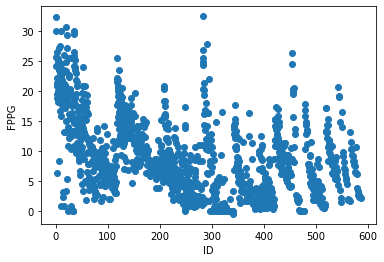

In [5]:
# we will plot the data to see if a linear trend exists
plt.scatter(X, y)
plt.xlabel("ID")
plt.ylabel("FPPG")

In [6]:
# we will split the data into training and testing
from sklearn.model_selection import train_test_split

# begin solution
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [8]:
# we will fit the model
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# we will calculate mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# using the model to make predictions
predicted = model.predict(X_test)

# score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 31.988454239987846
R-squared (R2 ): 0.16224541548613713


In [10]:
# call the score methon on the model to show the r2 score
model.score(X_test, y_test)

0.16224541548613713

<function matplotlib.pyplot.show(close=None, block=None)>

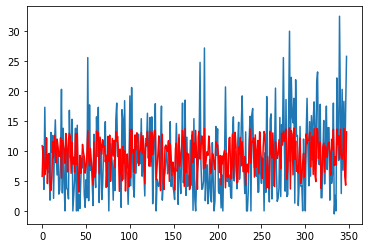

In [11]:
plt.plot(y_test)
plt.plot(predicted, color = 'red')
plt.show

In [12]:
##
##Making the new predicted values with 100% of the data
##

In [13]:
# create the model to get values for all IDs
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()

In [14]:
# we will fit the model
model_2.fit(X, y)

LinearRegression()

In [15]:
# we will calculate mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# using the model to make predictions
predicted_2 = model_2.predict(X)

# score the predictions with mse and r2
mse = mean_squared_error(y, predicted_2)
r2 = r2_score(y, predicted_2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 33.08881384929177
R-squared (R2 ): 0.198334309294114


In [16]:
# call the score methon on the model to show the r2 score
model_2.score(X, y)

0.198334309294114

In [17]:
# we want to look at our array
predicted_2

array([[13.59830816],
       [13.5803626 ],
       [13.56241704],
       ...,
       [ 8.57355105],
       [ 3.10015491],
       [ 6.16884586]])

In [19]:
# we will put the array into a dataframe
df = pd.DataFrame(predicted_2, 
             columns=['Predicted_Values_FPPG'])

In [20]:
# let us see the dataframe
df

,Predicted_Values_FPPG
0,13.598308
1,13.580363
2,13.562417
3,13.544471
4,13.526526
...,...
1386,8.986299
1387,3.118100
1388,8.573551
1389,3.100155


In [22]:
# we want to only have the numeric values
only_values = df['Predicted_Values_FPPG']
only_values

0       13.598308
1       13.580363
2       13.562417
3       13.544471
4       13.526526
          ...    
1386     8.986299
1387     3.118100
1388     8.573551
1389     3.100155
1390     6.168846
Name: Predicted_Values_FPPG, Length: 1391, dtype: float64

In [24]:
# let us merge the dataframes by index
Final_data = pd.merge(football,only_values , left_index=True, right_index=True)

In [25]:
Final_data.to_csv('Predicted_values_FPPG.csv')